#라이브러리

In [ ]:
# lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import files
from matplotlib.ticker import FuncFormatter


#파일 업로드

In [ ]:
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
data = pd.read_csv('train.csv')

# 변수 설명

index

gender: 성별

car: 차량 소유 여부

reality: 부동산 소유 여부


child_num: 자녀 수


income_total: 연간 소득


income_type: 소득 분류


							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']



edu_type: 교육 수준


							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']



family_type: 결혼 여부


							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']



house_type: 생활 방식


							['Municipal apartment', 'House / apartment', 'With parents',

							

							 'Co-op apartment', 'Rented apartment', 'Office apartment']



DAYS_BIRTH: 출생일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미



DAYS_EMPLOYED: 업무 시작일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

													

							양수 값은 고용되지 않은 상태를 의미함



FLAG_MOBIL: 핸드폰 소유 여부


work_phone: 업무용 전화 소유 여부


phone: 전화 소유 여부


email: 이메일 소유 여부


occyp_type: 직업 유형													


family_size: 가족 규모


begin_month: 신용카드 발급 월
			

							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미







credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (낮을 수록 높은 신용의 신용카드 사용자를 의미)

# 데이터 확인

In [ ]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
data.shape

(26457, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
data.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

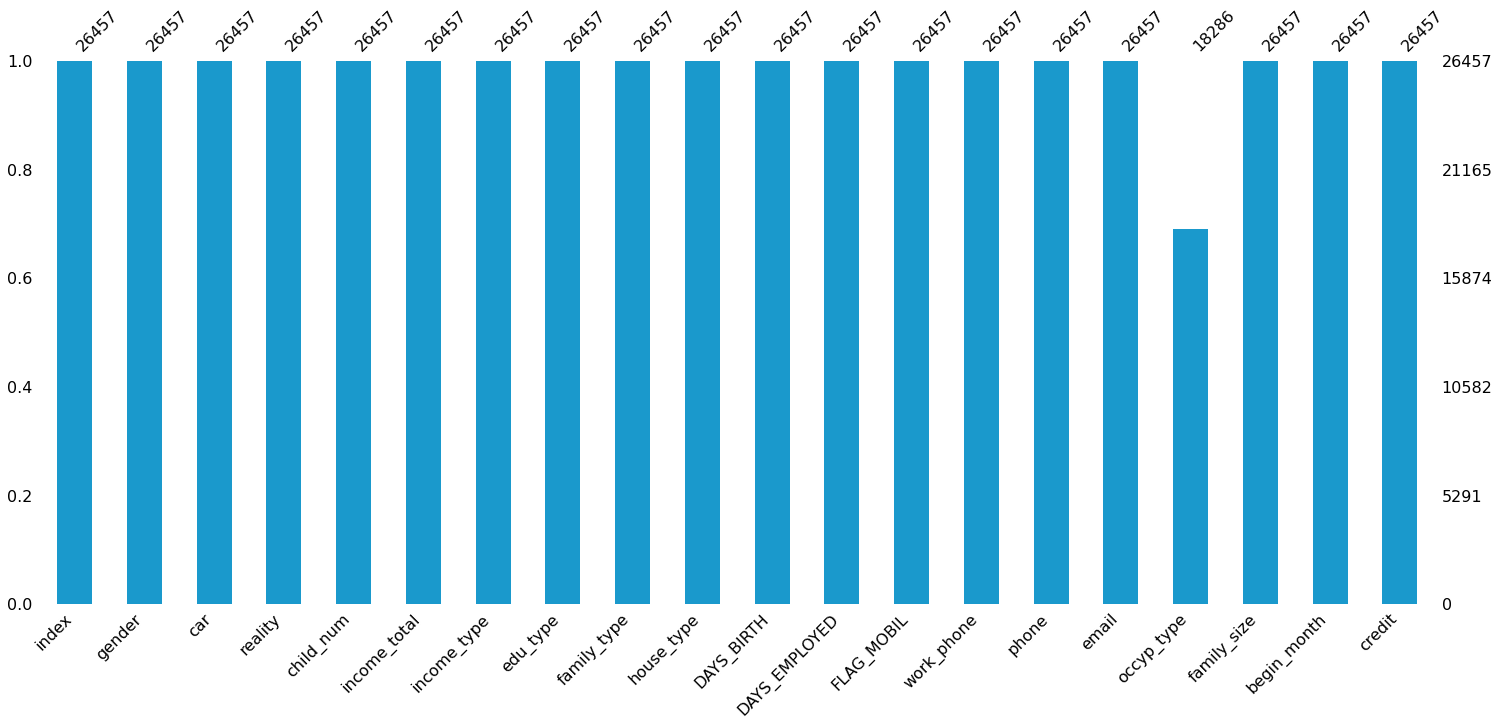

In [ ]:
msno.bar(df = data.iloc[:, :], 
         color = (0.1, 0.6, 0.8)
         )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


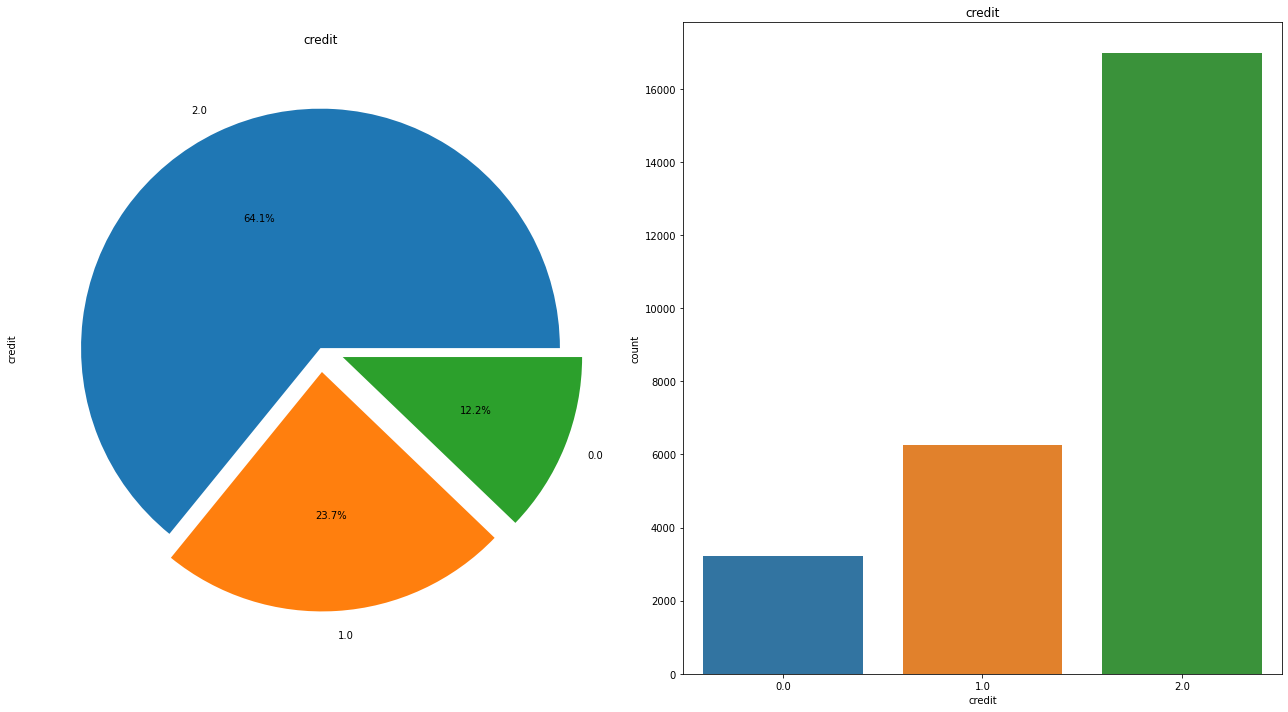

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18,10))

#ax0
data['credit'].value_counts().plot.pie(explode = [0, 0.1, 0.1], autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('credit')
ax[0].set_ylabel('credit')

#ax1
sns.countplot('credit', data = data, ax = ax[1])
ax[1].set_title('credit')

plt.tight_layout()
plt.show()

                  index  child_num  ...  begin_month    credit
index          1.000000   0.001012  ...     0.002181 -0.007841
child_num      0.001012   1.000000  ...    -0.007229  0.004081
income_total   0.009848   0.032186  ...    -0.018047  0.008555
DAYS_BIRTH    -0.008901   0.332816  ...     0.057306 -0.025187
DAYS_EMPLOYED  0.004259  -0.228159  ...     0.007964 -0.003798
FLAG_MOBIL          NaN        NaN  ...          NaN       NaN
work_phone    -0.005575   0.051521  ...    -0.008563 -0.003134
phone         -0.001790  -0.010555  ...    -0.014286  0.003452
email          0.005332   0.016120  ...     0.002320  0.014812
family_size   -0.002867   0.890530  ...    -0.023032  0.008227
begin_month    0.002181  -0.007229  ...     1.000000 -0.147477
credit        -0.007841   0.004081  ...    -0.147477  1.000000

[12 rows x 12 columns]


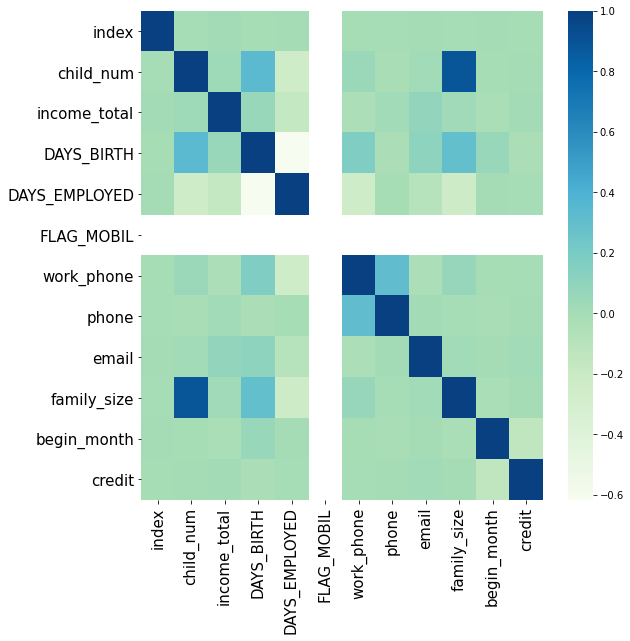

In [ ]:
plt.figure(figsize =(9,9))
corr = data.corr()
sns.heatmap(corr,cmap='GnBu')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

print(corr)

# 함수

In [ ]:
def func1(column):

    f, ax = plt.subplots(1, 2, figsize = (18, 10))
    
    # ax0
    data[[column, 'credit']].groupby([column]).mean().plot.bar(ax = ax[0], color = '#d0d0d0', alpha = 0.5, width = 0.6, edgecolor = 'black')
    ax[0].set_title('Credit Mean by Feature', fontweight = 'bold')
    ax[0].tick_params(axis='x', labelrotation=60)
    ax[0].grid(True)


    # ax1
    sns.countplot(
               column,
               hue = 'credit', 
               data = data, 
               ax = ax[1], 
               alpha = 0.5, 
               edgecolor = 'black'
               )

    ax[1].set_title('Credit Count by Feature', fontweight = 'bold')
    ax[1].tick_params(axis='x', labelrotation=60)
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
def func2(column):
    f, ax = plt.subplots(1, 2, figsize = (18, 10))

    # ax0
    data[column].value_counts().plot.bar(ax = ax[0], 
                                        alpha = 0.5,
                                        width = 0.6,
                                        edgecolor = 'black',
                                        color = '#d0d0d0'
                                        )
    
    ax[0].set_title('Count by Feature', fontweight = 'bold')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', labelrotation=60)
    ax[0].grid(True)
    
    #ax1
    sns.countplot('credit', 
              hue = column, 
              data = data, 
              ax = ax[1],
              alpha = 0.5,
              edgecolor = 'black')
    
    ax[1].set_title('Credit Count by Feature', fontweight = 'bold')
    ax[1].tick_params(axis='x', labelrotation=60)
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# 변수별 신용도 EDA

####성별에 따른 신용도

In [ ]:
data.groupby(['gender'])['credit'].count()

gender
F    17697
M     8760
Name: credit, dtype: int64

In [ ]:
data.groupby(['gender', 'credit'])['credit'].count()

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11329
M       0.0        1074
        1.0        2047
        2.0        5639
Name: credit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


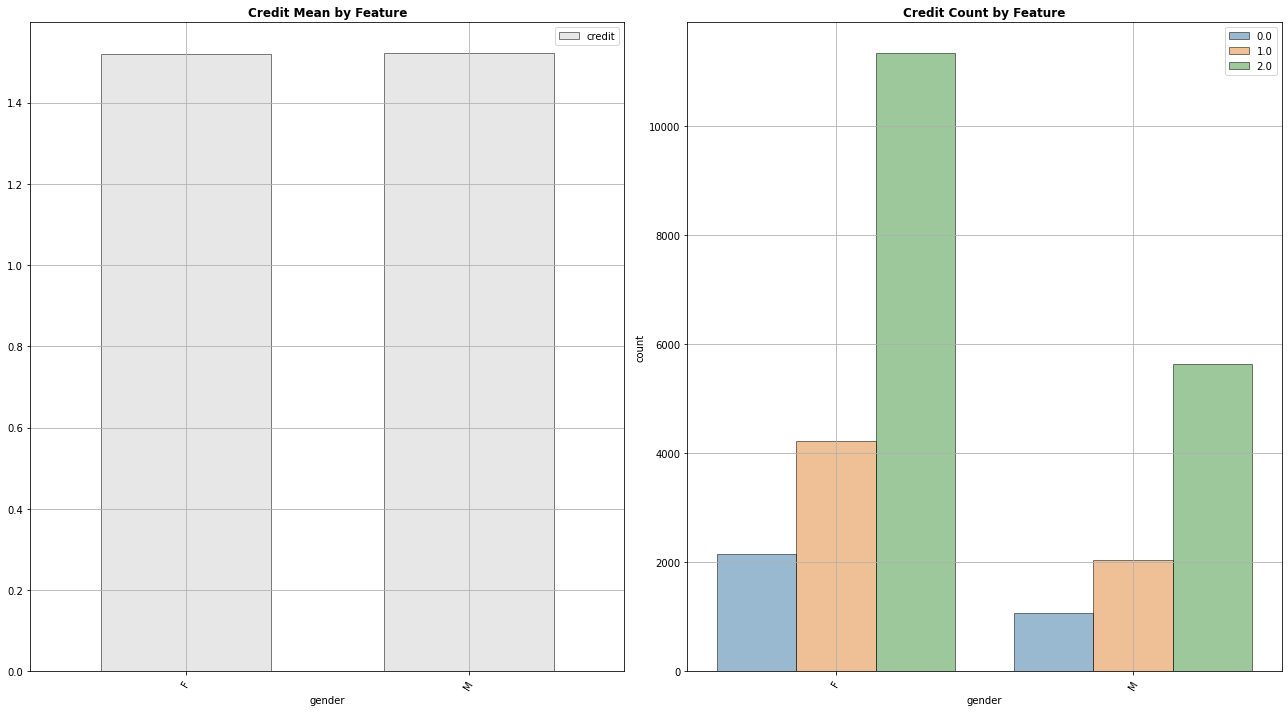

In [ ]:
func1('gender')

In [ ]:
pd.crosstab(data.gender, data.credit, margins = True).style.background_gradient(cmap = 'Set2')

credit,0.0,1.0,2.0,All
gender,,,,
F,2148,4220,11329,17697
M,1074,2047,5639,8760
All,3222,6267,16968,26457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


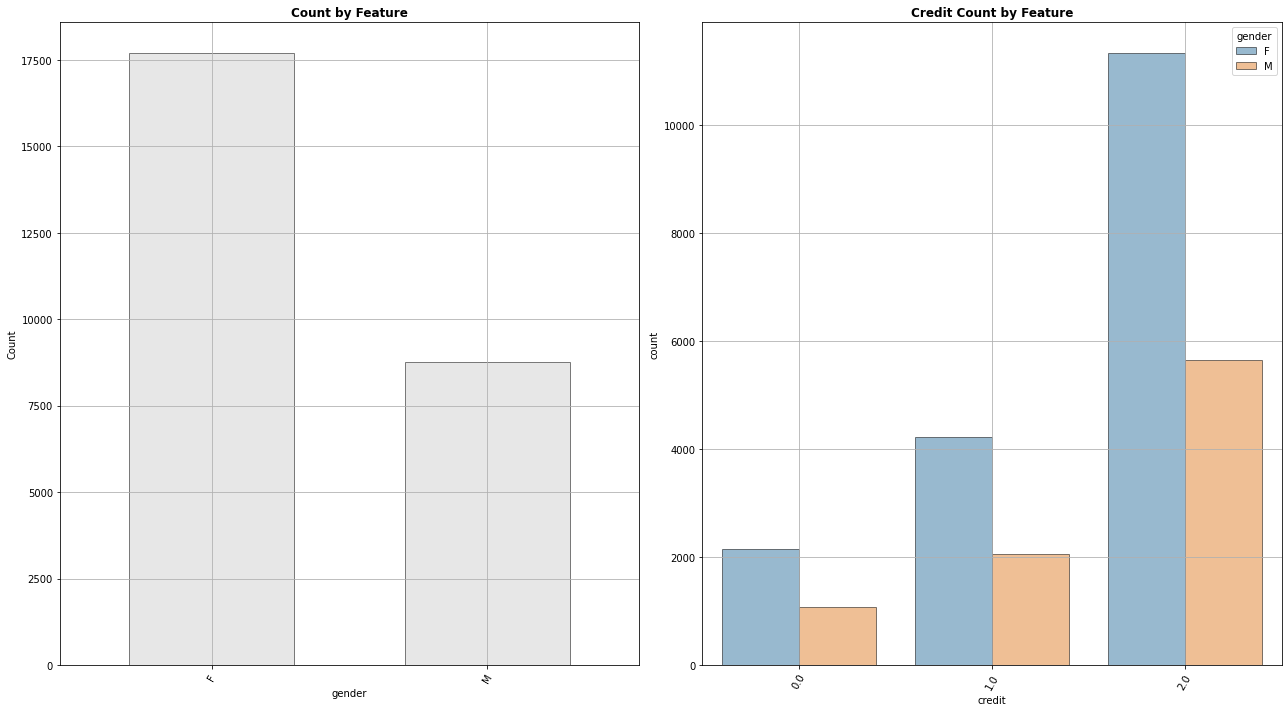

In [ ]:
func2('gender')

#### 차랑소유여부에 따른 신용도

In [ ]:
data.groupby(['car'])['credit'].count()

car
N    16410
Y    10047
Name: credit, dtype: int64

In [ ]:
data.groupby(['car', 'credit'])['credit'].count()

car  credit
N    0.0        1982
     1.0        3990
     2.0       10438
Y    0.0        1240
     1.0        2277
     2.0        6530
Name: credit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


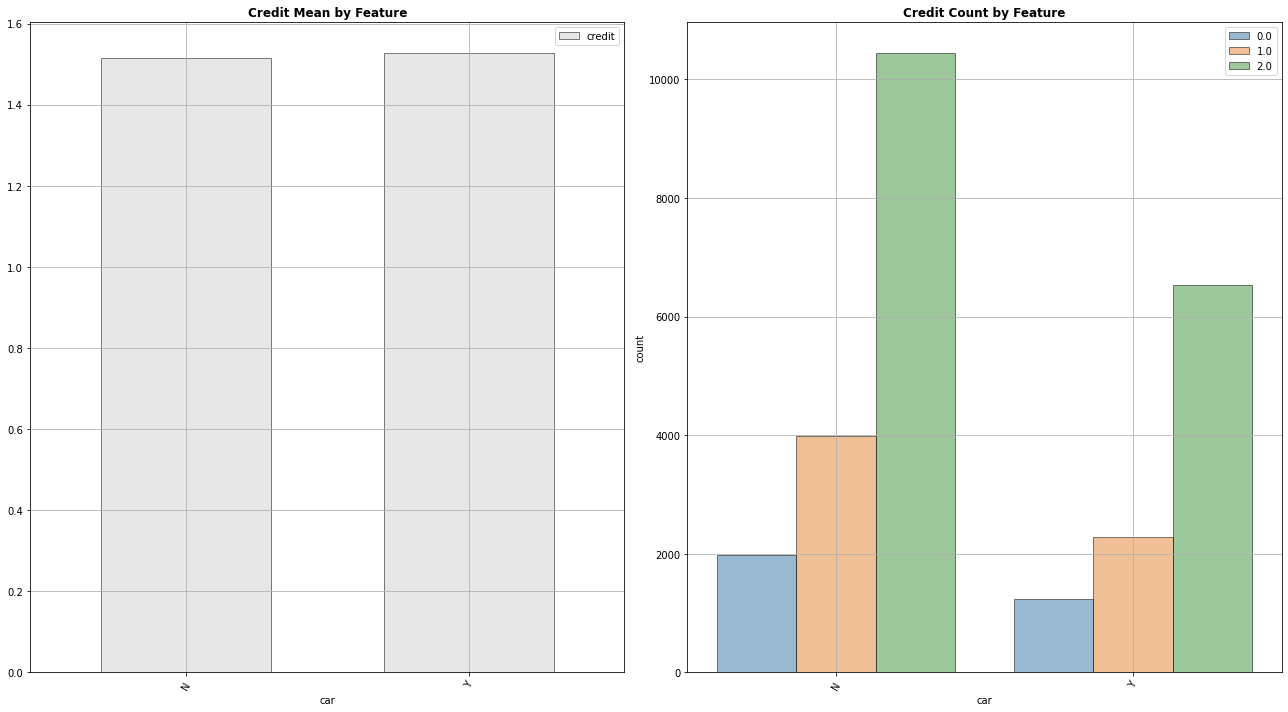

In [ ]:
func1('car')

In [ ]:
pd.crosstab(data.credit, data.car, margins = True).style.background_gradient(cmap = 'Set2')

car,N,Y,All
credit,,,
0.0,1982,1240,3222
1.0,3990,2277,6267
2.0,10438,6530,16968
All,16410,10047,26457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


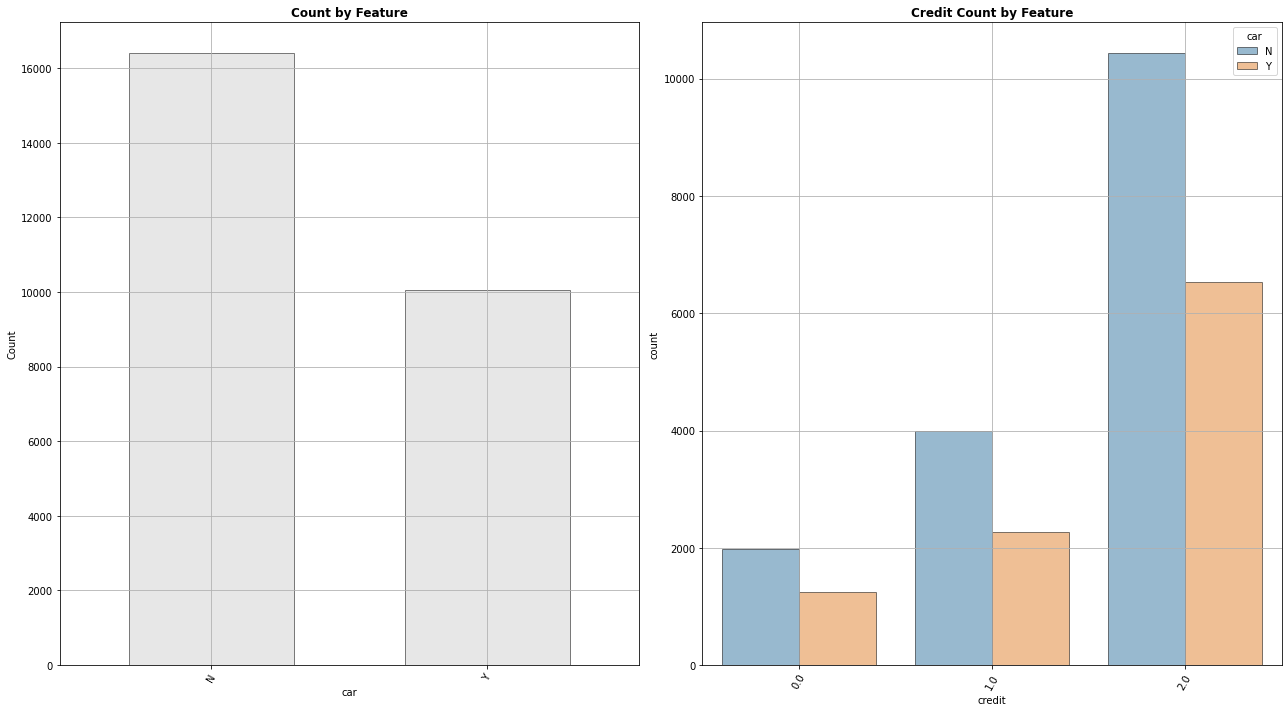

In [ ]:
func2('car')

#### 부동산 소유 여부에 따른 신용도

In [ ]:
data.groupby(['reality'])['credit'].count()

reality
N     8627
Y    17830
Name: credit, dtype: int64

In [ ]:
data.groupby(['reality', 'credit'])['credit'].count()

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5628
Y        0.0        2158
         1.0        4332
         2.0       11340
Name: credit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


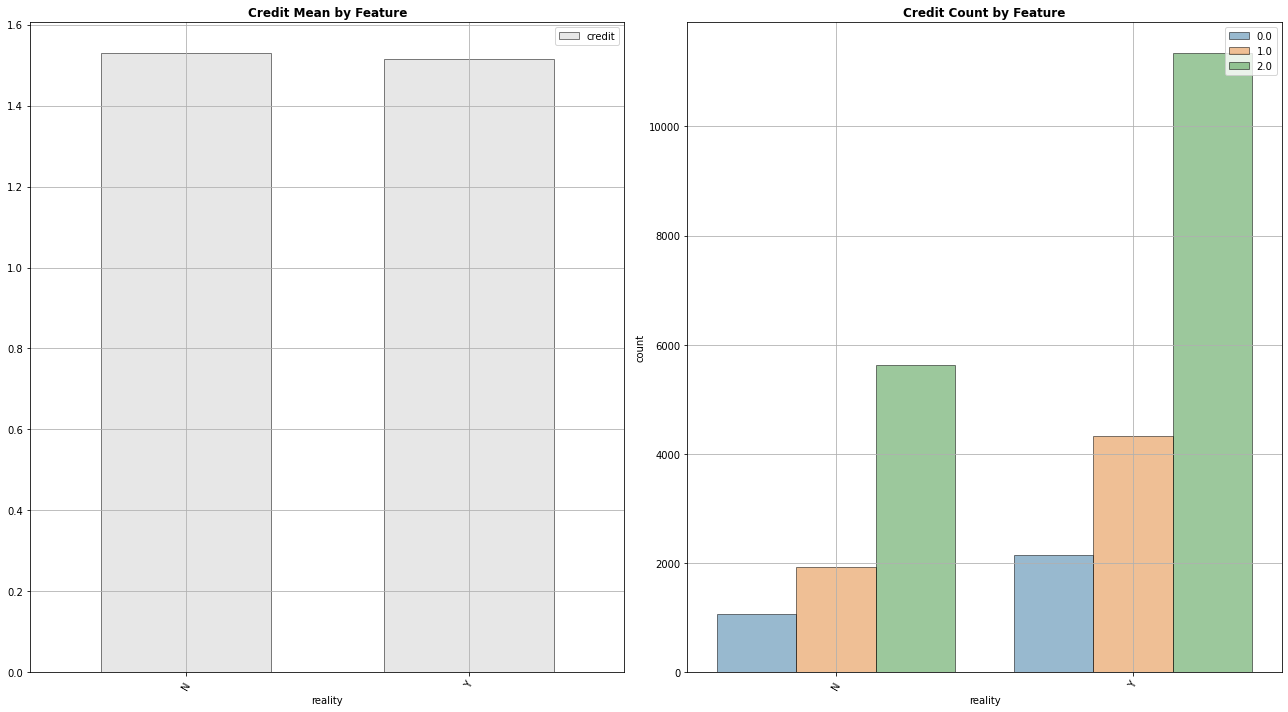

In [ ]:
func1('reality')

In [ ]:
pd.crosstab(data.reality, data.credit, margins = True).style.background_gradient(cmap = 'Set2')

credit,0.0,1.0,2.0,All
reality,,,,
N,1064,1935,5628,8627
Y,2158,4332,11340,17830
All,3222,6267,16968,26457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


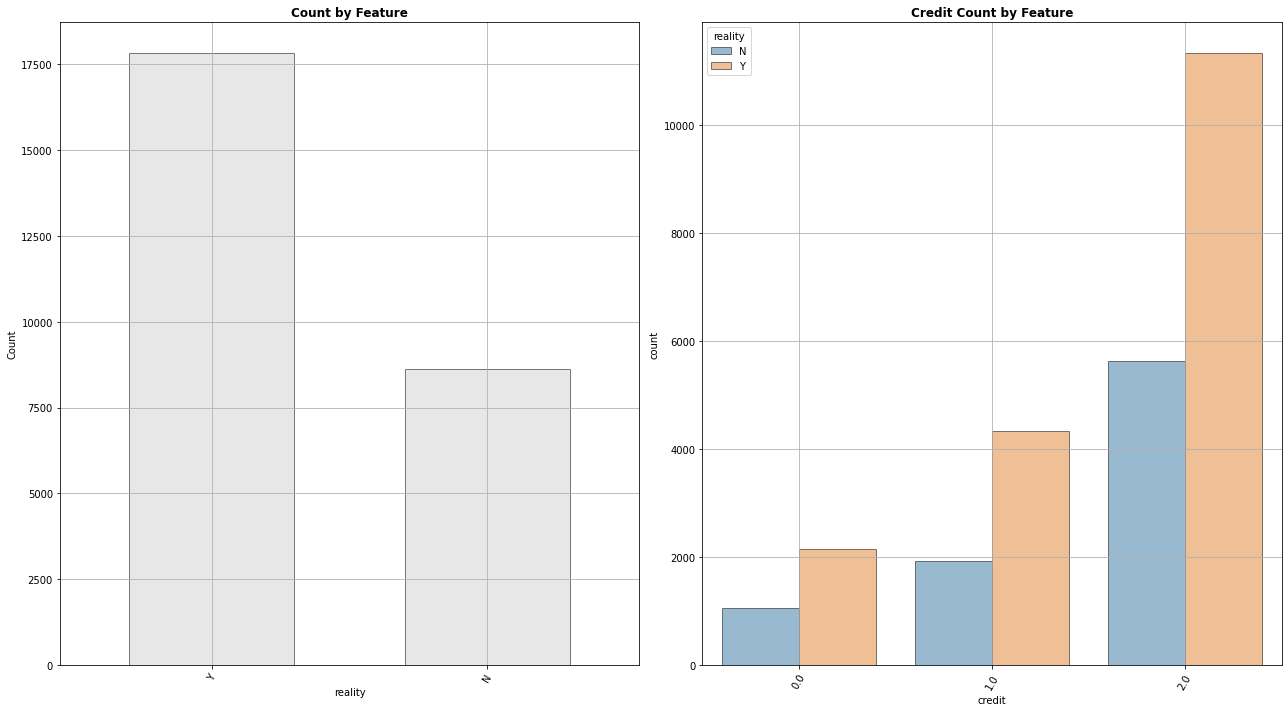

In [ ]:
func2('reality')

#### 주거 타입에 따른 신용도

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


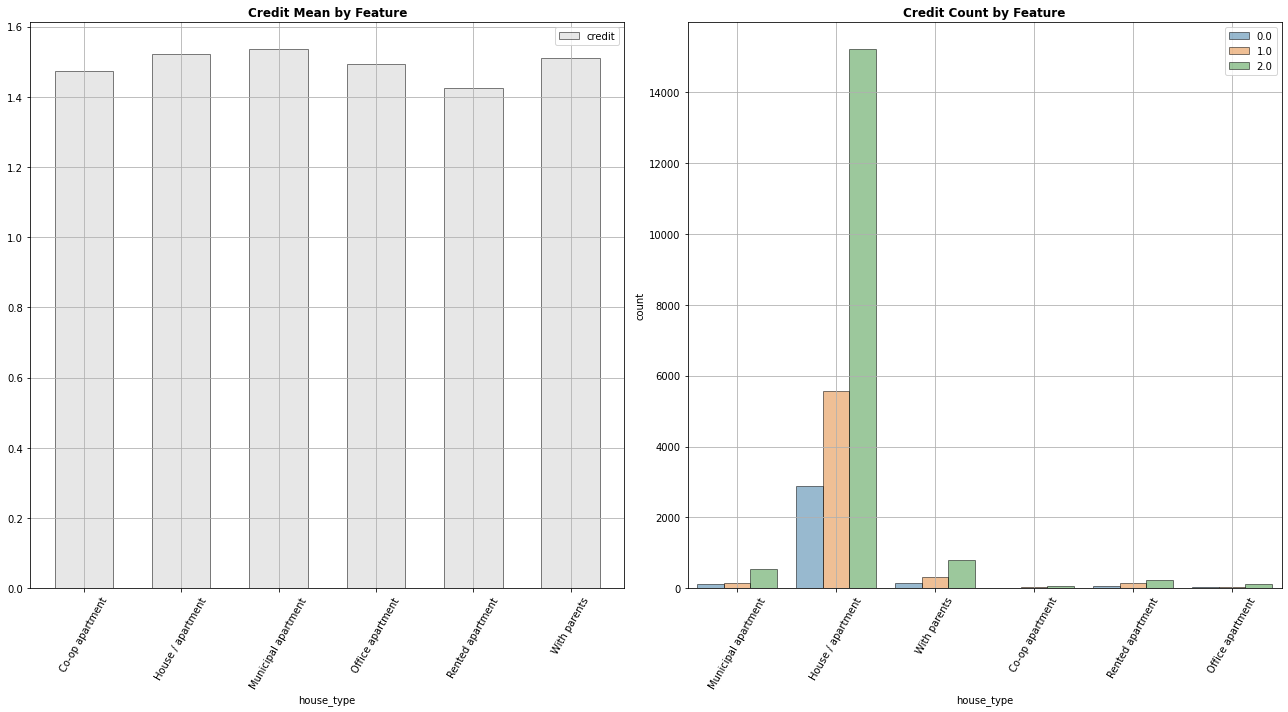

In [ ]:
func1('house_type')

In [ ]:
pd.crosstab(data.house_type, data.credit, margins = True).style.background_gradient(cmap = 'Set2')

credit,0.0,1.0,2.0,All
house_type,,,,
Co-op apartment,14,30,66,110
House / apartment,2873,5569,15211,23653
Municipal apartment,110,160,548,818
Office apartment,24,48,118,190
Rented apartment,50,147,232,429
With parents,151,313,793,1257
All,3222,6267,16968,26457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


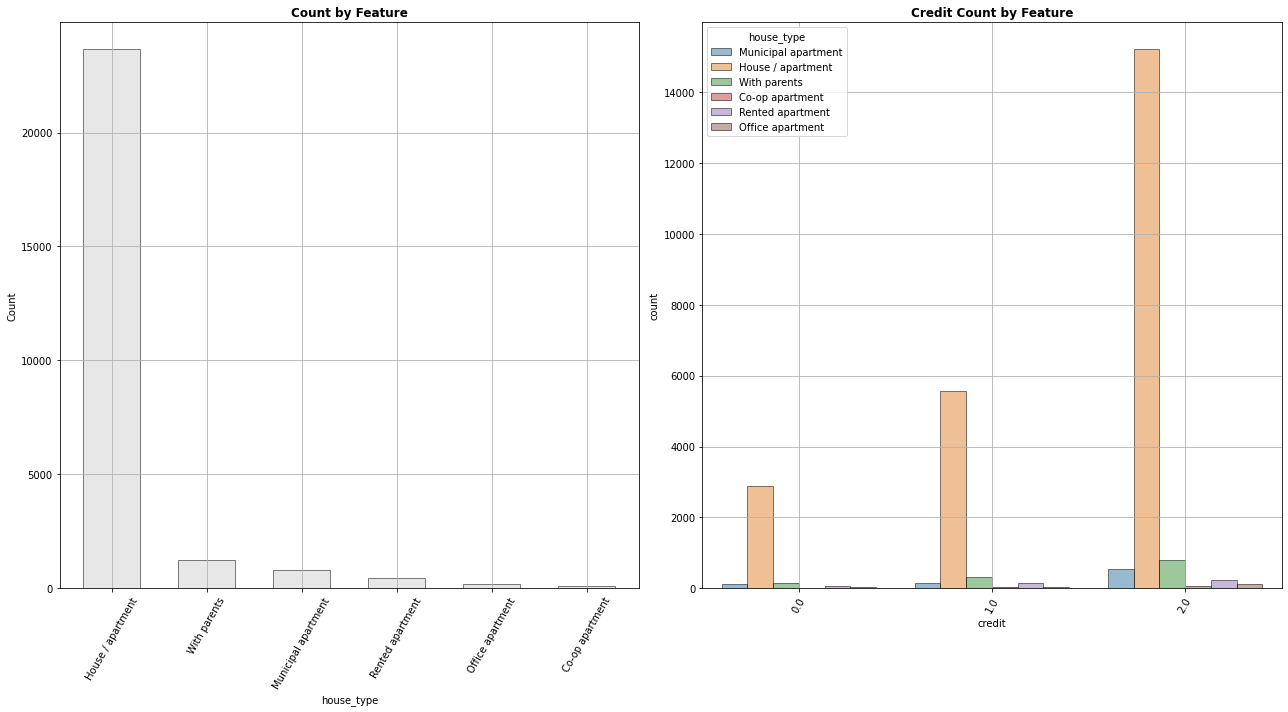

In [ ]:
func2('house_type')

#### 결혼 여부에 따른 신용도

In [ ]:
data.groupby(['family_type'])['credit'].count()

family_type
Civil marriage           2123
Married                 18196
Separated                1539
Single / not married     3496
Widow                    1103
Name: credit, dtype: int64

In [ ]:
data.groupby(['family_type', 'credit'])['credit'].count()

family_type           credit
Civil marriage        0.0         288
                      1.0         539
                      2.0        1296
Married               0.0        2213
                      1.0        4140
                      2.0       11843
Separated             0.0         193
                      1.0         349
                      2.0         997
Single / not married  0.0         402
                      1.0         940
                      2.0        2154
Widow                 0.0         126
                      1.0         299
                      2.0         678
Name: credit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


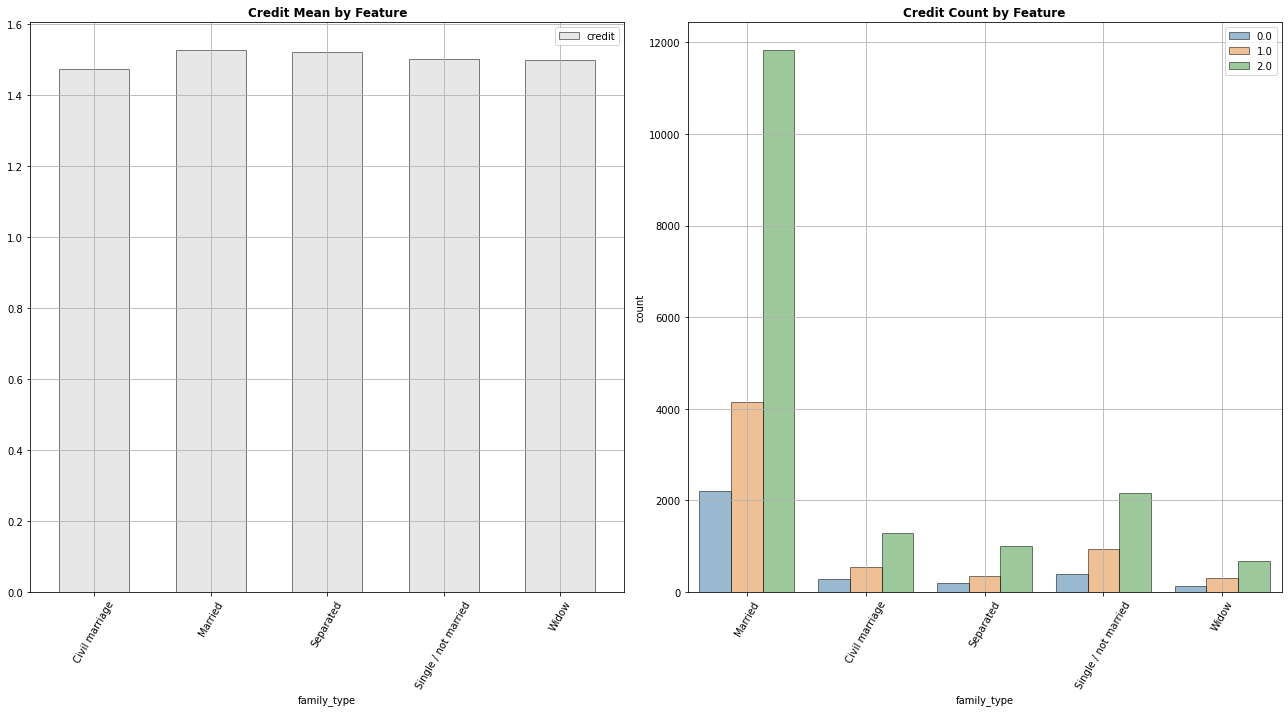

In [ ]:
func1('family_type')

In [ ]:
pd.crosstab(data.credit, data.family_type, margins = True).style.background_gradient(cmap = 'Set2')

family_type,Civil marriage,Married,Separated,Single / not married,Widow,All
credit,,,,,,
0.0,288,2213,193,402,126,3222
1.0,539,4140,349,940,299,6267
2.0,1296,11843,997,2154,678,16968
All,2123,18196,1539,3496,1103,26457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


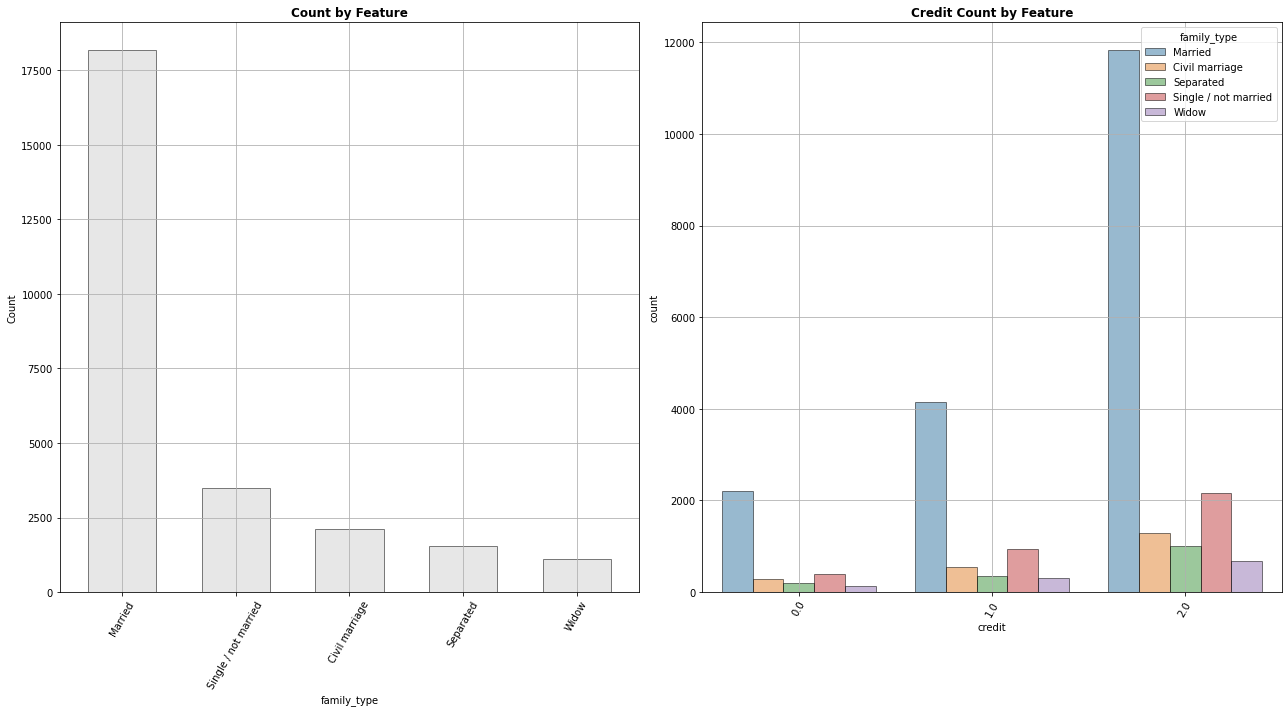

In [ ]:
func2('family_type')

#### 소득 분류에 따른 신용도

In [ ]:
data.groupby(['income_type'])['credit'].count()

income_type
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Working                 13645
Name: credit, dtype: int64

In [ ]:
data.groupby(['income_type', 'credit'])['credit'].count()

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8659
Name: credit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


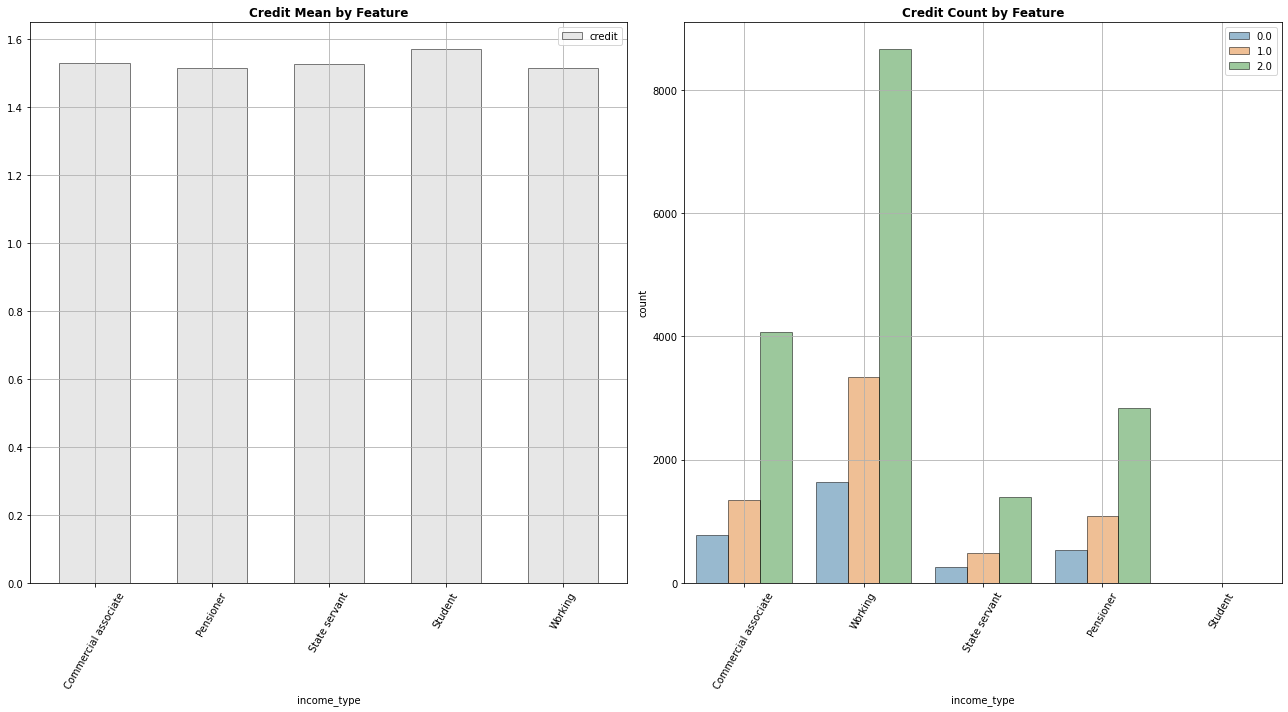

In [ ]:
func1('income_type')

In [ ]:
pd.crosstab(data.credit, data.income_type, margins = True).style.background_gradient(cmap = 'Set2')

income_type,Commercial associate,Pensioner,State servant,Student,Working,All
credit,,,,,,
0.0,782,536,265,0,1639,3222
1.0,1344,1084,489,3,3347,6267
2.0,4076,2829,1400,4,8659,16968
All,6202,4449,2154,7,13645,26457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


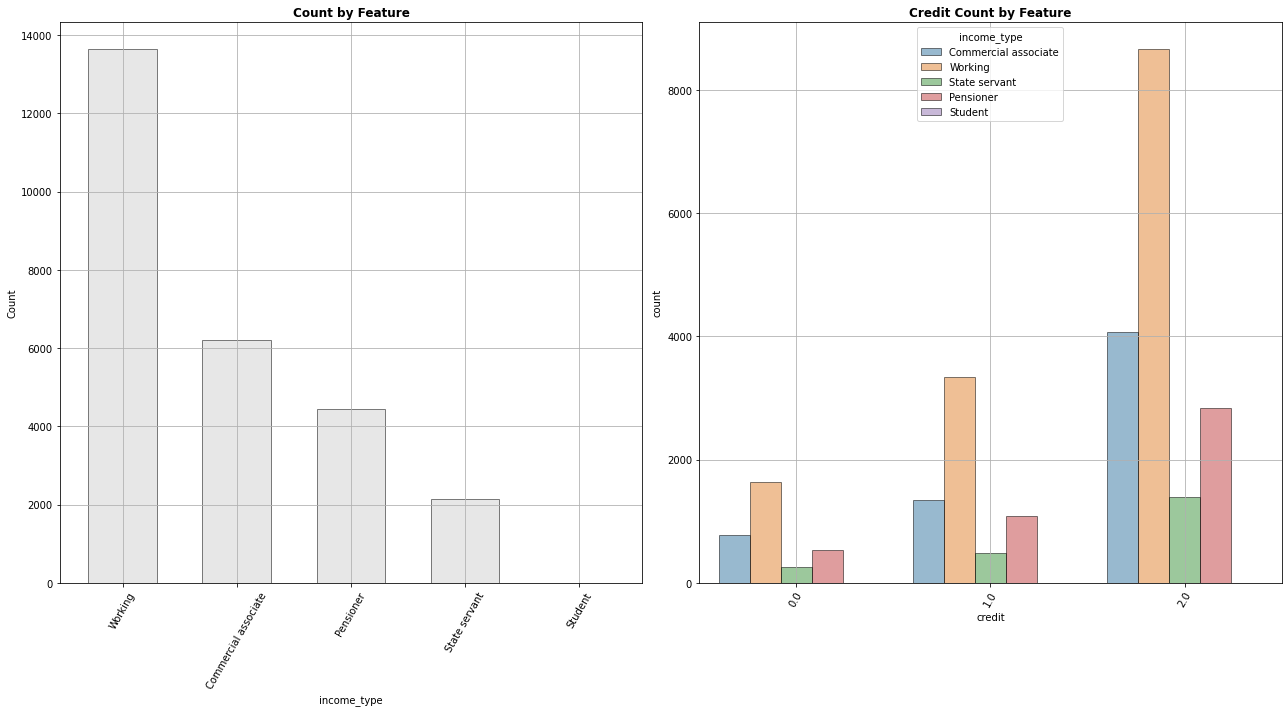

In [ ]:
func2('income_type')

#### 직업 유형에 따른 신용도

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

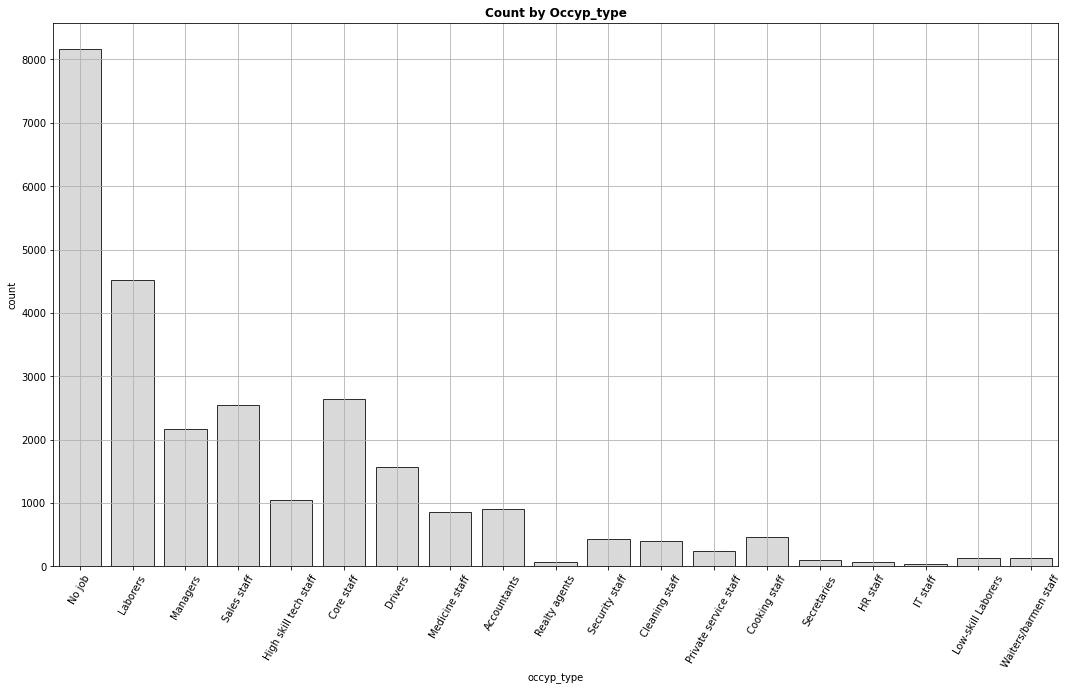

In [ ]:
# occyp_type 전처리
data = data.fillna({'occyp_type':'No job'})


f, ax = plt.subplots(1,1, figsize = (18, 10))
sns.countplot('occyp_type', 
              data = data, 
              ax = ax, 
              color = '#d0d0d0',
              edgecolor = 'black',
              alpha = 0.8,
              )

plt.title('Count by Occyp_type', fontweight = 'bold')
plt.grid(True)
plt.xticks(rotation = 60)

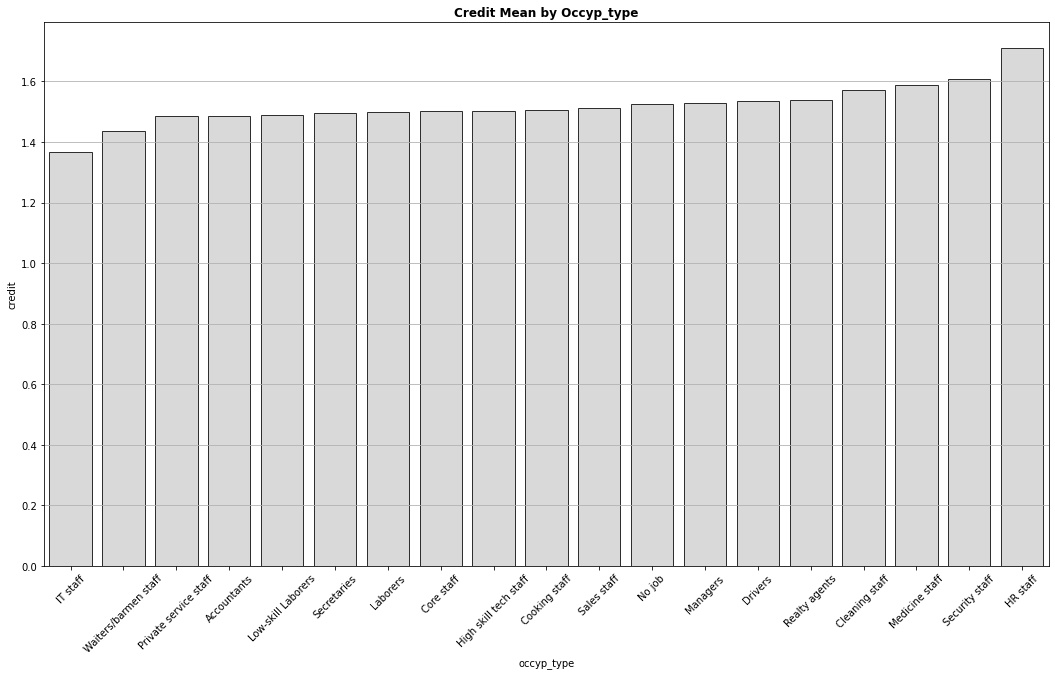

In [ ]:
occyp_type_comp = data.groupby(['occyp_type'])['credit'].mean().to_frame().sort_values(by='credit', ascending = 'False')


plt.figure(figsize=(18,10))
plt.xticks(rotation = 45)
plt.title('Credit Mean by Occyp_type', fontweight = 'bold')
plt.grid(True)


sns.barplot(data=occyp_type_comp, 
            x = occyp_type_comp.index, 
            y = 'credit', 
            color = '#d0d0d0',
            edgecolor = 'black',
            alpha = 0.8
            )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


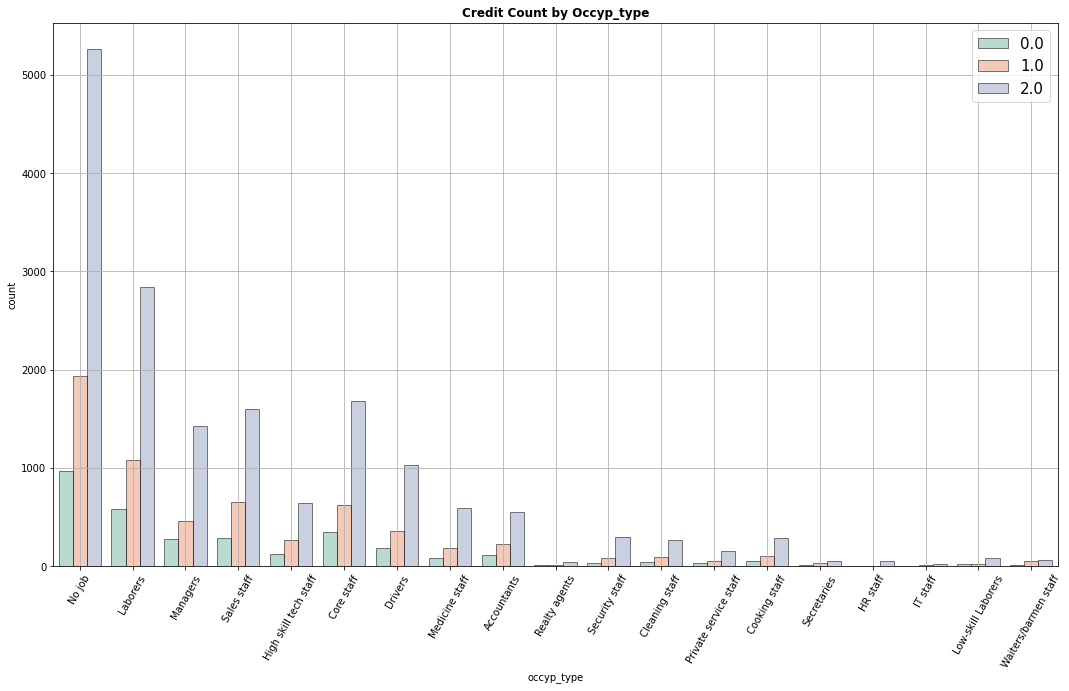

In [ ]:
f, ax = plt.subplots(1,1, figsize = (18, 10))
sns.countplot('occyp_type', 
              hue = 'credit', 
              data = data, 
              ax = ax, 
              palette = 'Set2',
              edgecolor = 'black',
              alpha = 0.5
              )

plt.title('Credit Count by Occyp_type', fontweight = 'bold')
plt.xticks(rotation = 60)
plt.grid(True)
plt.legend(prop={'size': 15})

#### 교육 수준에 따른 신용도

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


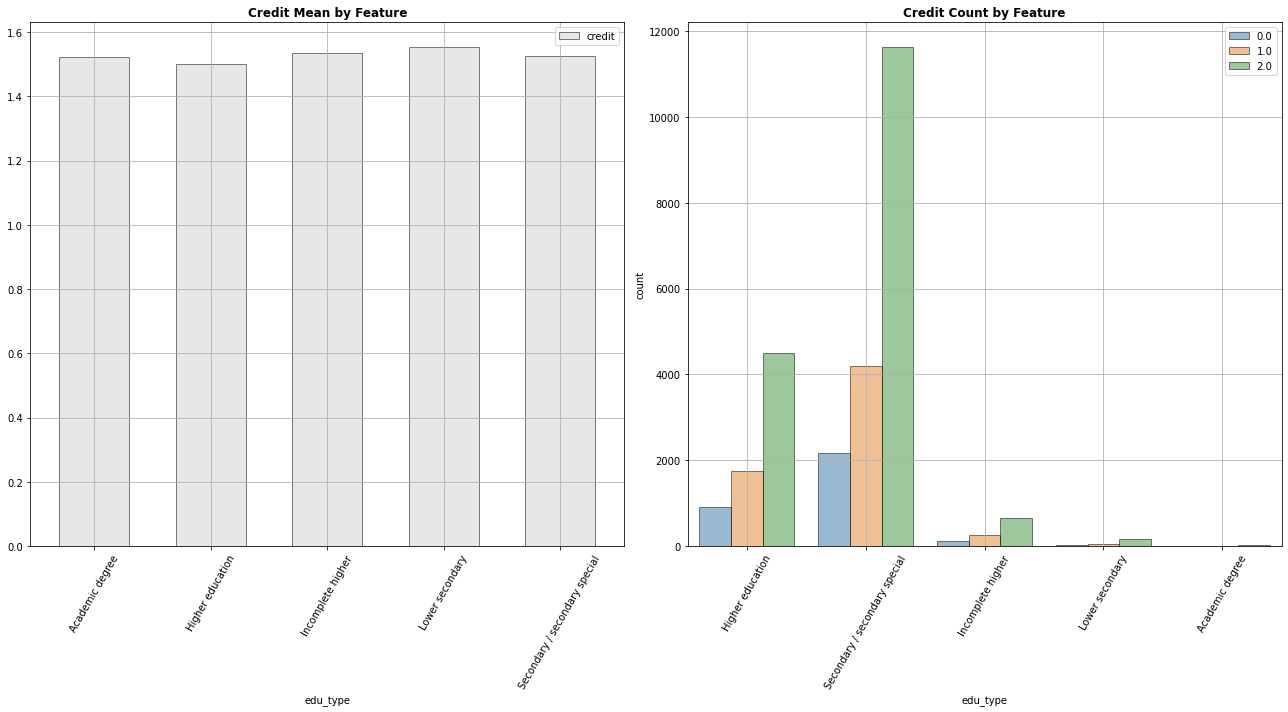

In [ ]:
func1('edu_type')

In [ ]:
pd.crosstab(data.edu_type, data.credit, margins = True).style.background_gradient(cmap = 'Set2')

credit,0.0,1.0,2.0,All
edu_type,,,,
Academic degree,2,7,14,23
Higher education,909,1751,4502,7162
Incomplete higher,114,246,660,1020
Lower secondary,28,59,170,257
Secondary / secondary special,2169,4204,11622,17995
All,3222,6267,16968,26457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


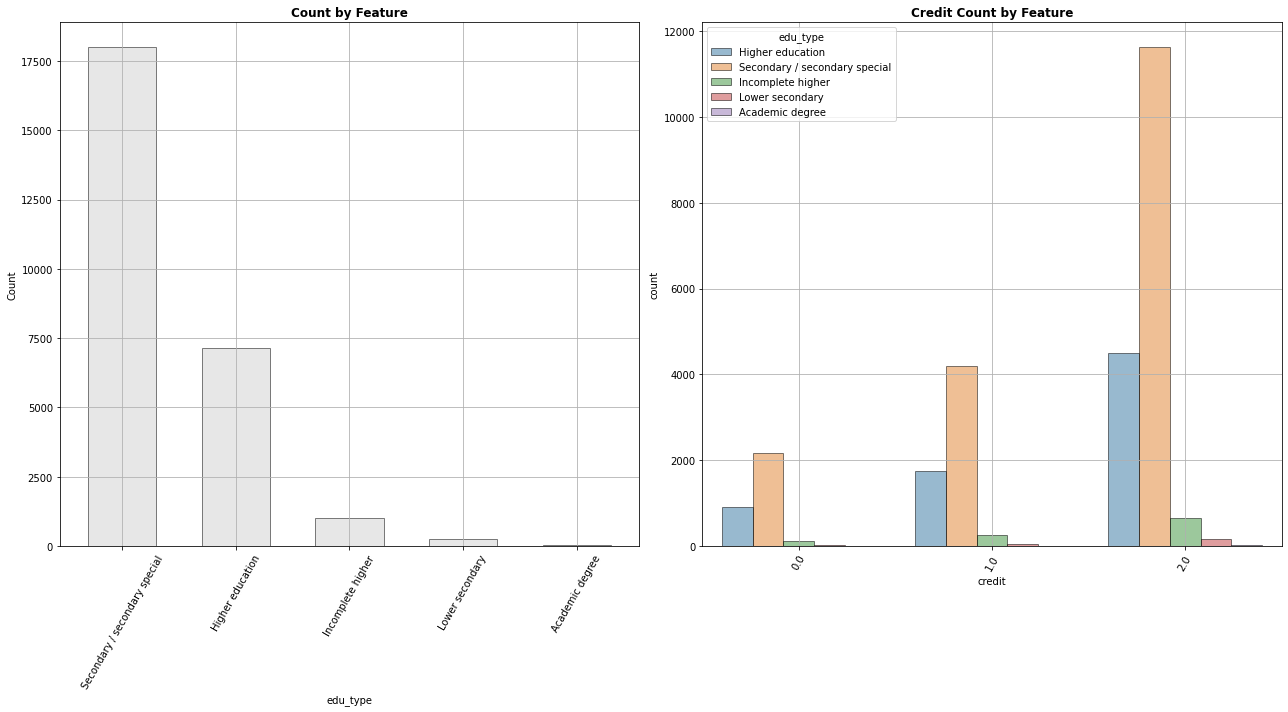

In [ ]:
func2('edu_type')

#### 휴대폰 소유 여부에 따른 신용도

In [ ]:
data.groupby(['FLAG_MOBIL'])['credit'].count()

FLAG_MOBIL
1    26457
Name: credit, dtype: int64

In [ ]:
data.groupby(['FLAG_MOBIL', 'credit'])['credit'].count()

FLAG_MOBIL  credit
1           0.0        3222
            1.0        6267
            2.0       16968
Name: credit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


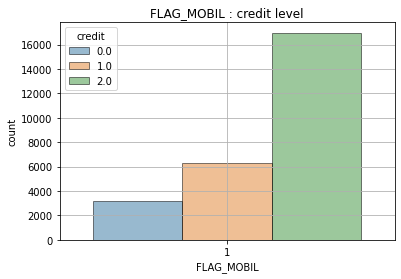

In [ ]:
sns.countplot('FLAG_MOBIL', 
              hue = 'credit', 
              data = data,
              alpha = 0.5,
              edgecolor = 'black')
plt.title('FLAG_MOBIL : credit level')

plt.grid(True)
plt.show()


In [ ]:
pd.crosstab(data.credit, data.FLAG_MOBIL, margins = True).style.background_gradient(cmap = 'summer_r')

FLAG_MOBIL,1,All
credit,,
0.0,3222,3222
1.0,6267,6267
2.0,16968,16968
All,26457,26457


#### 업무용 전화 소유 여부에 따른 신용도

In [ ]:
data.groupby(['work_phone'])['credit'].count()

work_phone
0    20511
1     5946
Name: credit, dtype: int64

In [ ]:
data.groupby(['work_phone', 'credit'])['credit'].count()

work_phone  credit
0           0.0        2493
            1.0        4844
            2.0       13174
1           0.0         729
            1.0        1423
            2.0        3794
Name: credit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


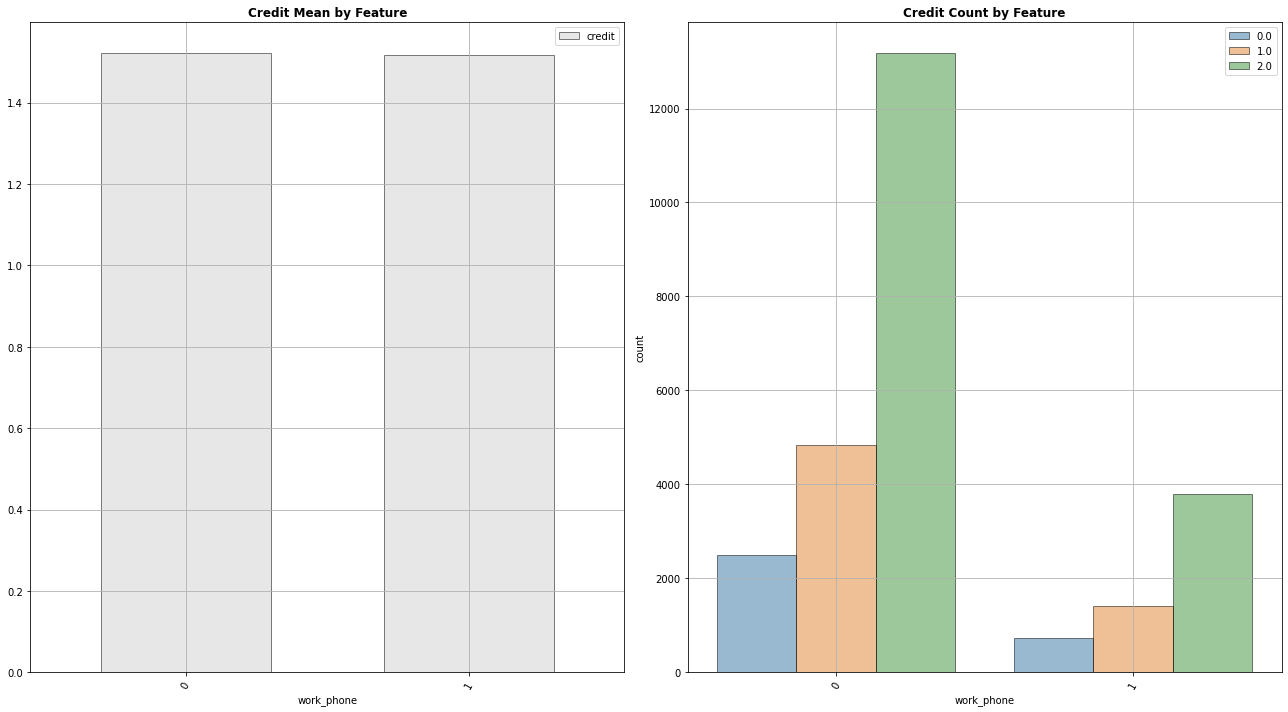

In [ ]:
func1('work_phone')

In [ ]:
pd.crosstab(data.credit, data.work_phone, margins = True).style.background_gradient(cmap = 'Set2')

work_phone,0,1,All
credit,,,
0.0,2493,729,3222
1.0,4844,1423,6267
2.0,13174,3794,16968
All,20511,5946,26457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


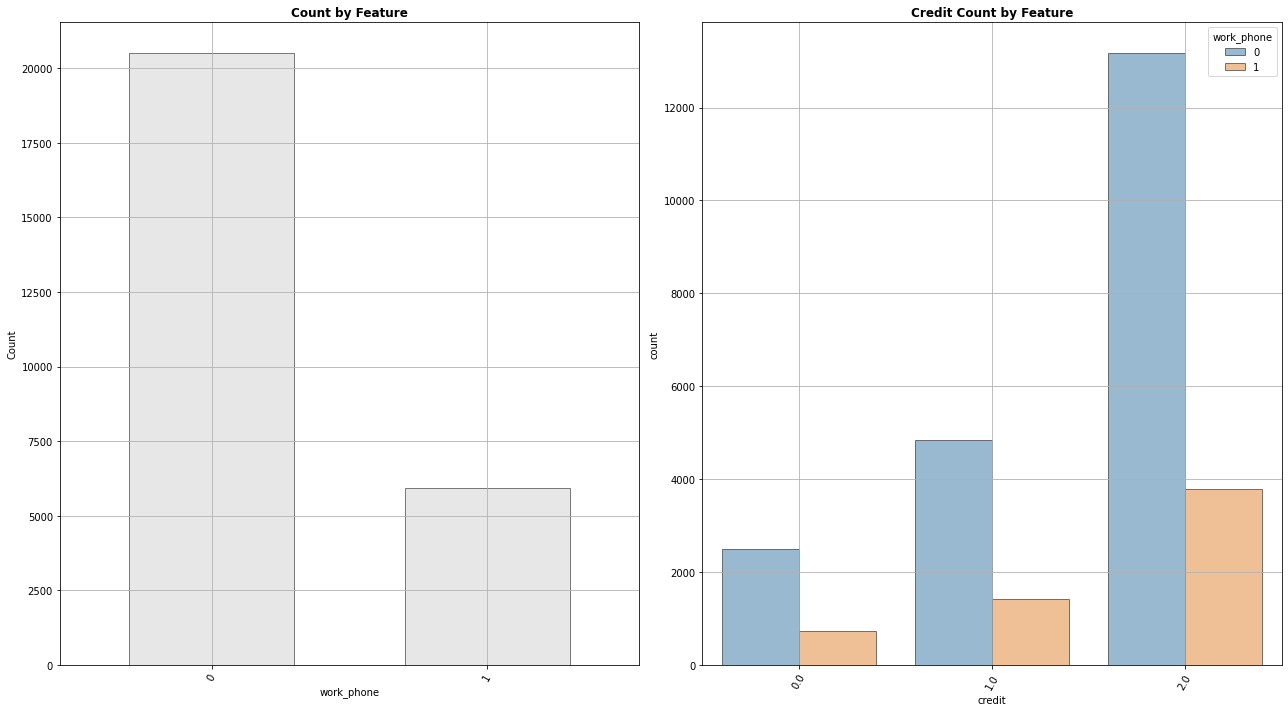

In [ ]:
func2('work_phone')

#### 전화 소유 여부에 따른 신용도

In [ ]:
data.groupby(['phone'])['credit'].count()

phone
0    18672
1     7785
Name: credit, dtype: int64

In [ ]:
data.groupby(['phone', 'credit'])['credit'].count()

phone  credit
0      0.0        2245
       1.0        4510
       2.0       11917
1      0.0         977
       1.0        1757
       2.0        5051
Name: credit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


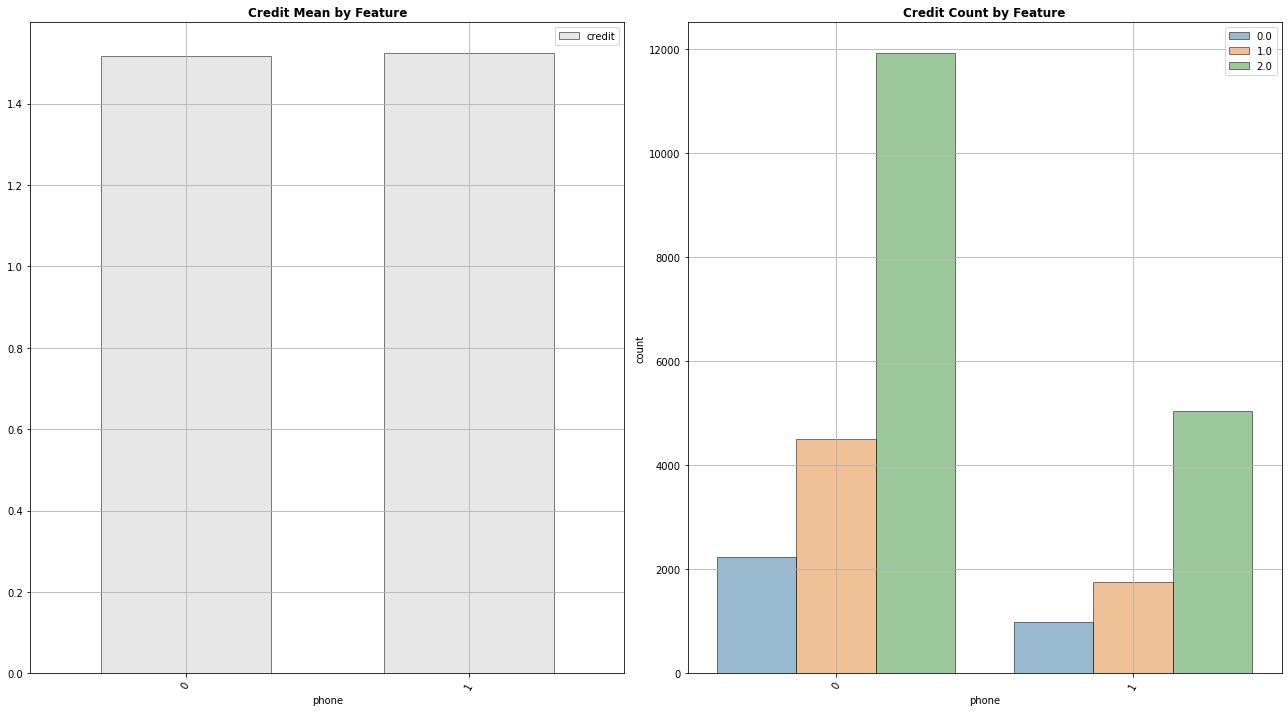

In [ ]:
func1('phone')

In [ ]:
pd.crosstab(data.credit, data.phone, margins=True).style.background_gradient(cmap = 'Set2')

phone,0,1,All
credit,,,
0.0,2245,977,3222
1.0,4510,1757,6267
2.0,11917,5051,16968
All,18672,7785,26457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


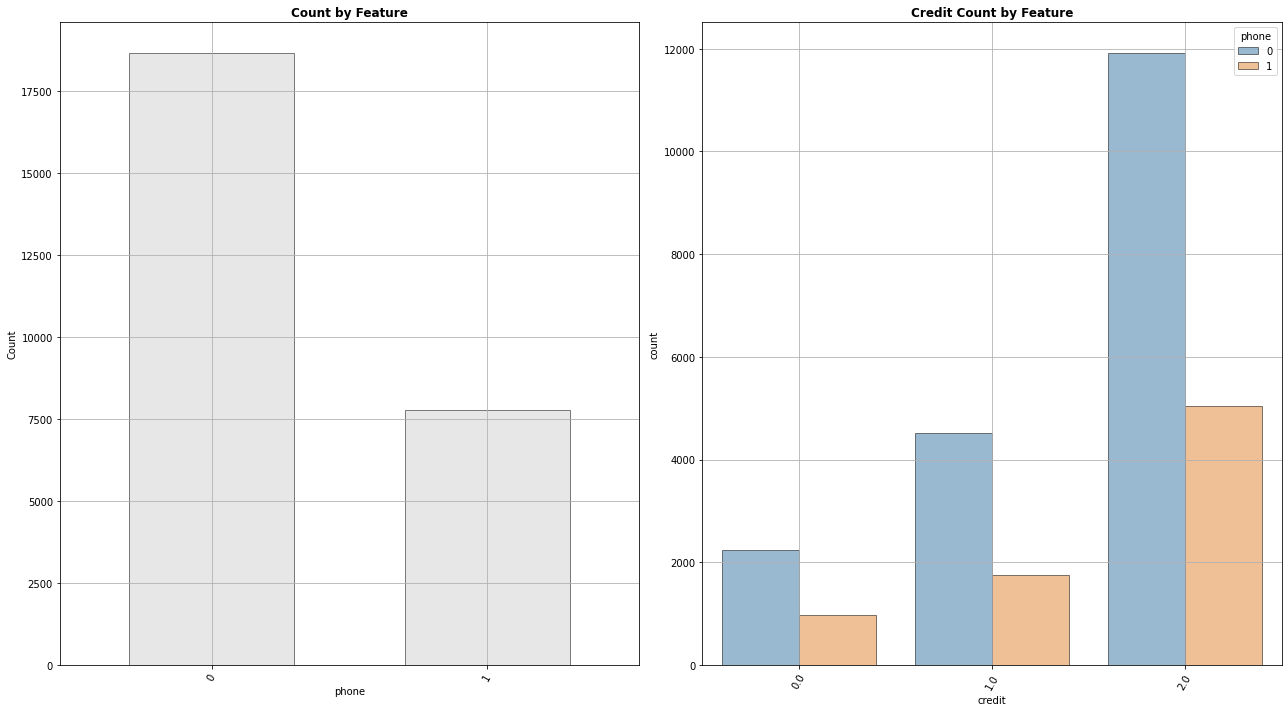

In [ ]:
func2('phone')

#### 자녀 수에 따른 신용도

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


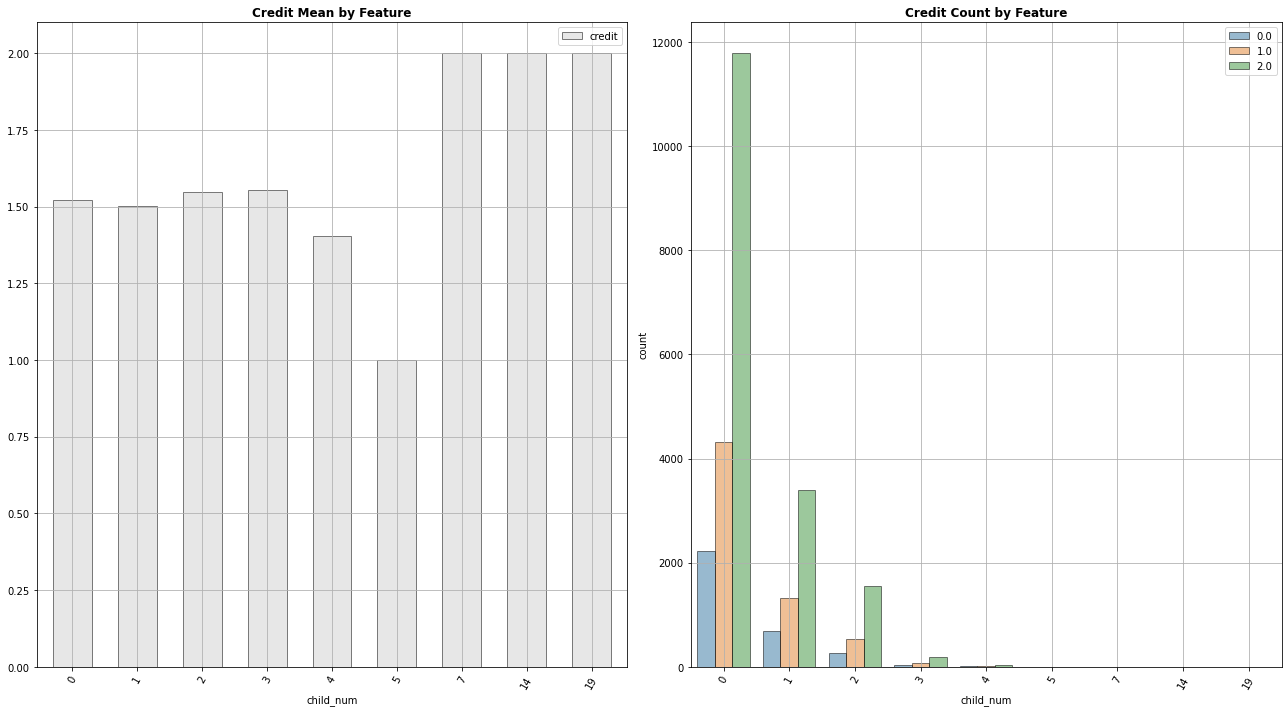

In [ ]:
func1('child_num')

In [ ]:
pd.crosstab(data.credit,data.child_num,margins=True).style.background_gradient(cmap='Set2')

child_num,0,1,2,3,4,5,7,14,19,All
credit,,,,,,,,,,
0.0,2233,682,268,29,8,2,0,0,0,3222
1.0,4322,1313,535,79,12,6,0,0,0,6267
2.0,11785,3391,1559,198,27,2,2,3,1,16968
All,18340,5386,2362,306,47,10,2,3,1,26457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


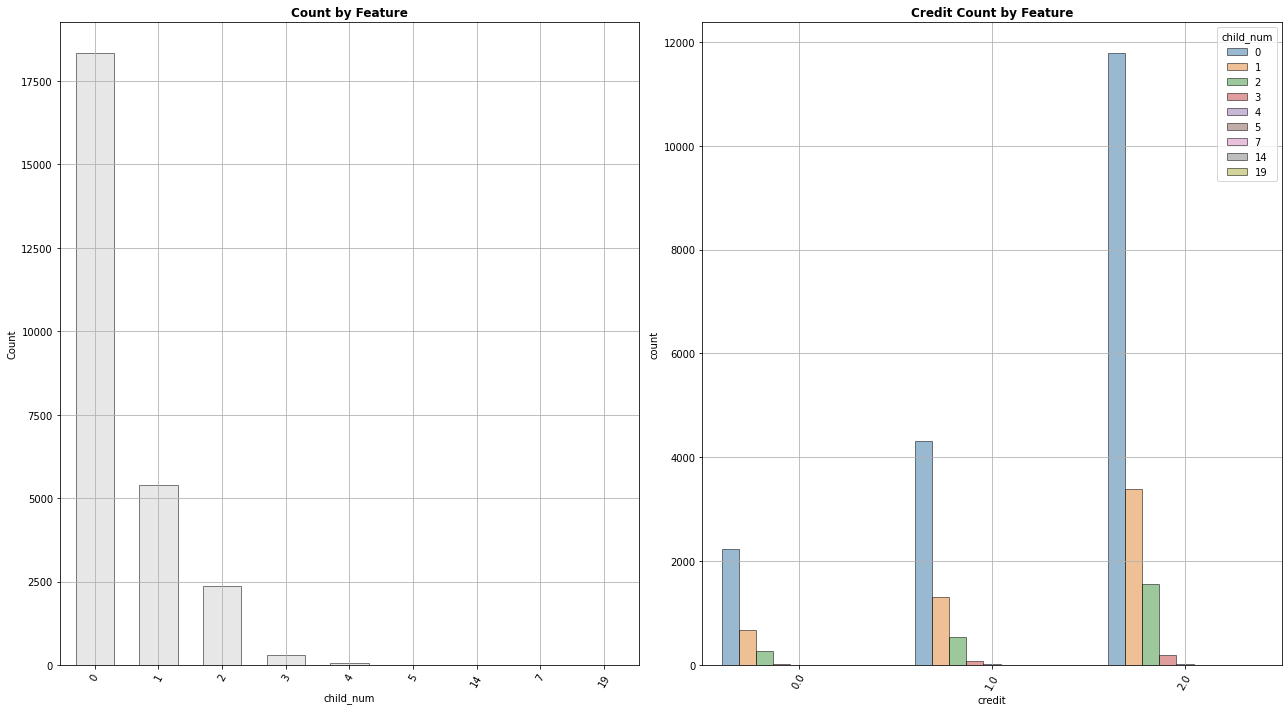

In [ ]:
func2('child_num')

#### 총소득, 나이, 직장 경력에 따른 신용도

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


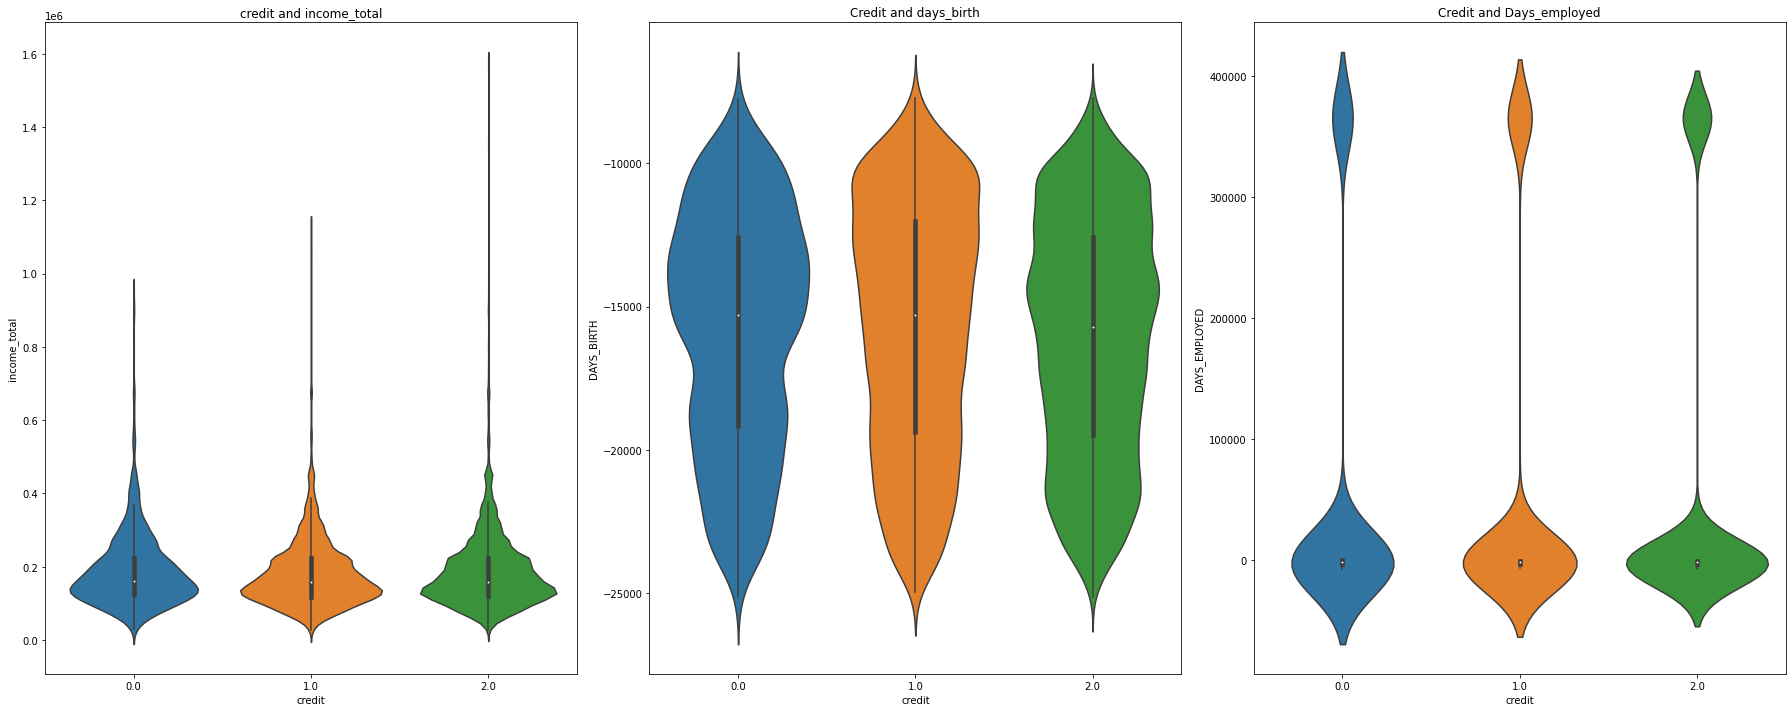

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (25, 10))

# ax0
sns.violinplot('credit', 
               'income_total', 
               data = data, 
               split = True, 
               ax = ax[0])
ax[0].set_title('credit and income_total')


# ax1
sns.violinplot('credit', 
               'DAYS_BIRTH', 
               data = data, 
               split = True,
               ax = ax[1])
ax[1].set_title('Credit and days_birth')


# ax2
sns.violinplot('credit', 
               'DAYS_EMPLOYED',
               data = data, 
               split = True,
               ax = ax[2])
ax[2].set_title('Credit and Days_employed')

plt.tight_layout()
plt.show()

In [ ]:
data.loc[(data.DAYS_EMPLOYED) >= 0, 'DAYS_EMPLOYED'] = 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


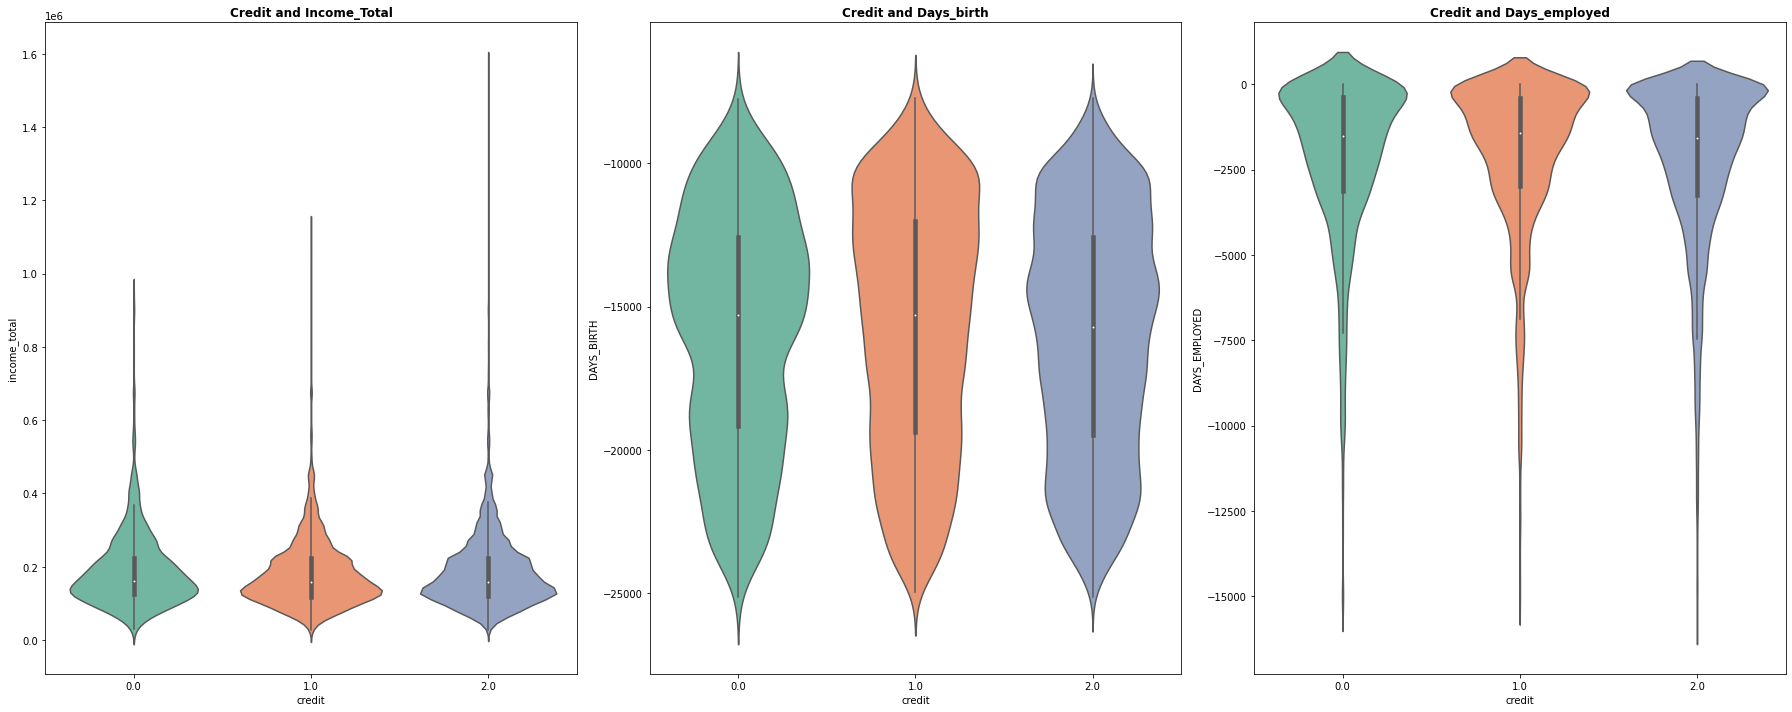

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (25, 10))

# ax0
sns.violinplot('credit', 
               'income_total', 
               data = data, 
               split = True, 
               ax = ax[0],
               palette = 'Set2',
               )
ax[0].set_title('Credit and Income_Total', fontweight = 'bold')


#ax1
sns.violinplot('credit', 
               'DAYS_BIRTH', 
               data = data, 
               split = True, 
               ax = ax[1],
               palette = 'Set2')
ax[1].set_title('Credit and Days_birth', fontweight = 'bold')


#ax2
sns.violinplot('credit', 
               'DAYS_EMPLOYED',
               data = data, 
               split = True, 
               ax = ax[2],
               palette = 'Set2')
ax[2].set_title('Credit and Days_employed', fontweight = 'bold')

plt.tight_layout()
plt.show()